In [2]:
import torch
import matplotlib.pyplot as plt

%matplotlib widget

/home/msc5/.pyenv/versions/3.9.10/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/home/msc5/.pyenv/versions/3.9.10/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.

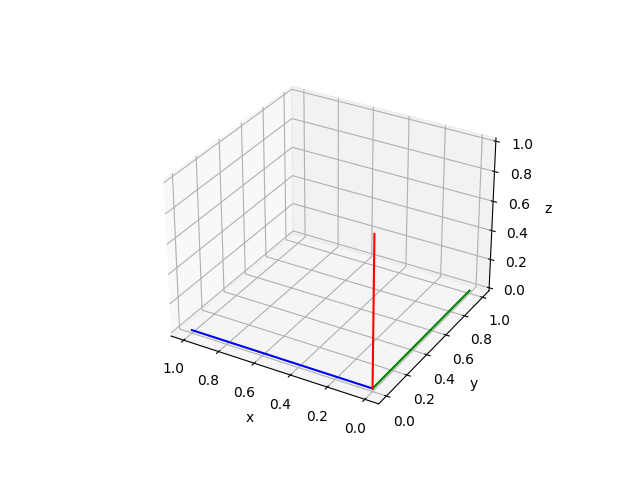

In [3]:
ax = plt.figure().add_subplot(projection='3d')
ax.invert_yaxis()

def axes(ax: plt.Axes, origin: torch.Tensor, basis: torch.Tensor):
    origin = origin[:, None].repeat(1, 3)
    axes = torch.stack([origin, basis], dim=-1)
    ax.plot(*axes[0], color='blue')
    ax.plot(*axes[1], color='green')
    ax.plot(*axes[2], color='red')

axes(ax, torch.zeros(3), torch.eye(3))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

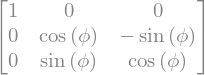

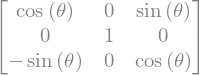

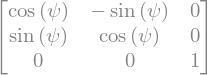

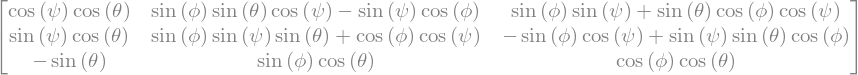

In [58]:
# Euler Angles

import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()

def Mx(angle: sp.Symbol):
    return sp.Matrix([[1, 0, 0], [0, sp.cos(angle), -sp.sin(angle)], [0, sp.sin(angle), sp.cos(angle)]])

def My(angle: sp.Symbol):
    return sp.Matrix([[sp.cos(angle), 0, sp.sin(angle)], [0, 1, 0], [-sp.sin(angle), 0, sp.cos(angle)]])

def Mz(angle: sp.Symbol):
    return sp.Matrix([[sp.cos(angle), -sp.sin(angle), 0], [sp.sin(angle), sp.cos(angle), 0], [0, 0, 1]])

phi, theta, psi = dynamicsymbols('phi, theta, psi')
mx = Mx(phi)
my = My(theta)
mz = Mz(psi)
display(mx, my, mz)

# B = Mx(phi) @ My(theta) @ Mz(psi) 
B = mz @ my @ mx
display(B)
# print(sp.latex(B))

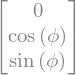

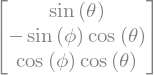

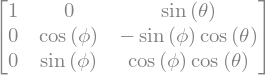

\left[\begin{matrix}1 & 0 & \sin{\left(\theta{\left(t \right)} \right)}\\0 & \cos{\left(\phi{\left(t \right)} \right)} & - \sin{\left(\phi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)}\\0 & \sin{\left(\phi{\left(t \right)} \right)} & \cos{\left(\phi{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)}\end{matrix}\right]


In [60]:

t = sp.symbols('t')
Ox = sp.Matrix([1, 0, 0])
Oy = mx @ sp.Matrix([0, 1, 0])
Oz = mx @ my @ sp.Matrix([0, 0, 1])
display(Ox, Oy, Oz)

W = sp.Matrix.hstack(Ox, Oy, Oz)
display(W)

print(sp.latex(W))
